In [24]:
import sent2vec
import umap
from matplotlib import pyplot as plt

In [25]:
bio_sent_vec_model_location = "../biosentvec/model.bin"
validation_set_location = "../extracted_sentences/validation_set_filled.tsv"

In [26]:
validation_set = [l[0:8] for line in open(validation_set_location) if len(l:=line.strip().split('\t')) > 6][1:]

In [27]:
model_path = bio_sent_vec_model_location
biosentvec_model = sent2vec.Sent2vecModel()
try:
    biosentvec_model.load_model(model_path)
except Exception as e:
    print(e)
print('model successfully loaded')

model successfully loaded


In [28]:
embeddings = biosentvec_model.embed_sentences([vs[1] for vs in validation_set])

In [29]:
umap_reducer = umap.UMAP(metric='cosine')
embeddings_2d = umap_reducer.fit_transform(embeddings)

In [32]:
colors = ['y' if vs[6] == 'TRUE' or vs[7] == 'TRUE' else 'b' for vs in validation_set]

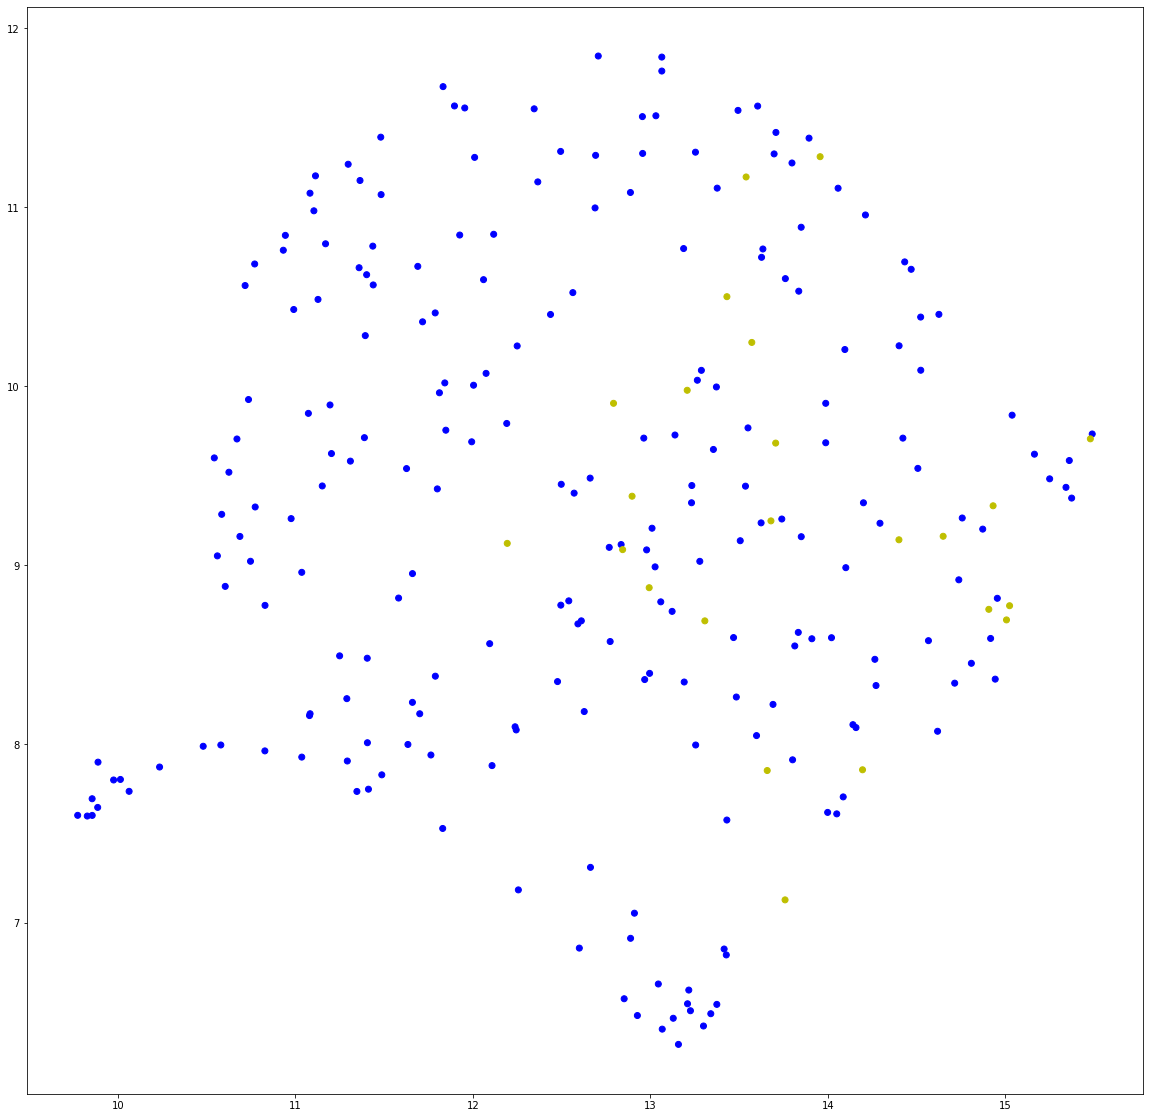

In [33]:
fig_scatter = plt.figure(figsize=(20, 20))
plt.scatter(x=list(embeddings_2d[:,0]), y=list(embeddings_2d[:,1]), c=colors)